In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean, std
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
import csv, statistics, collections, warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC, SVR 
from sklearn.naive_bayes import MultinomialNB, GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier 
from sklearn import svm, metrics
from sklearn.metrics import f1_score, r2_score, accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE 
from sklearn.feature_selection import RFE
from sklearn.preprocessing import Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neural_network import MLPClassifier 
from sklearn.cross_decomposition import PLSRegression 
from xgboost import XGBClassifier
%matplotlib inline

In [5]:
matrix_file = pd.read_csv("Arabidopsis_genes_matrix_combined.csv", index_col = 0)

In [6]:
matrix_file.head()

,Prediction,X3XHMGBOX1_col_a,ABF2_col_v3a,ABI5_col_v3h,ABR1_col_a,AGL13_col_b,AGL15_col_a,AGL16_col_a,AGL25_col_a,AGL42_col_a,...,bZIP48_col_a,bZIP50_col_v31,bZIP52_col_v31,bZIP53_col,bZIP68_col_a,bZIP69_col_a,dof24_col_a,dof42_col_a,dof43_col_a,dof45_col_a
Gene,,,,,,,,,,,,,,,,,,,,,
AT2G36100,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
AT2G28670,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
AT5G42180,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
AT1G30750,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,3,0,0
AT2G40113,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [7]:
matrix_file.tail()

,Prediction,X3XHMGBOX1_col_a,ABF2_col_v3a,ABI5_col_v3h,ABR1_col_a,AGL13_col_b,AGL15_col_a,AGL16_col_a,AGL25_col_a,AGL42_col_a,...,bZIP48_col_a,bZIP50_col_v31,bZIP52_col_v31,bZIP53_col,bZIP68_col_a,bZIP69_col_a,dof24_col_a,dof42_col_a,dof43_col_a,dof45_col_a
Gene,,,,,,,,,,,,,,,,,,,,,
AT1G19020,0,0,0,0,0,1,2,1,2,1,...,0,0,0,0,0,0,2,3,0,0
AT1G78570,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
AT2G14890,0,0,0,0,0,3,1,0,3,0,...,0,0,0,0,1,0,4,3,1,1
AT5G10430,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,2,0,0
AT5G15230,0,0,1,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,2,0,0


In [8]:
 matrix_file = matrix_file.applymap(lambda x: 1 if x > 0 else 0)

(array([108., 146.,  69.,  71.,  38.,  29.,  21.,   9.,  10.,  19.]),
 array([ 12. ,  43.2,  74.4, 105.6, 136.8, 168. , 199.2, 230.4, 261.6,
        292.8, 324. ]),
 <BarContainer object of 10 artists>)

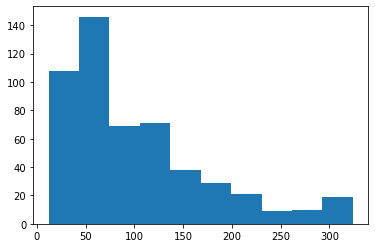

In [9]:
plt.hist(matrix_file.astype(bool).sum(axis=0))

In [10]:
bool_filt = np.array(matrix_file.astype(bool).sum(axis=0) > 100)

In [11]:
bool_filt

array([ True, False, False, False, False,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False,  True, False,  True, False, False,  True,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True,  True, False,  True,  True,  True, False,  True,
        True, False, False,  True,  True, False, False, False, False,
        True, False, False,  True, False, False, False,  True,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [12]:
matrix_file = matrix_file.loc[:,bool_filt]

In [13]:
matrix_file.tail()

,Prediction,AGL13_col_b,AGL15_col_a,AGL16_col_a,AGL25_col_a,AGL63_col_a,AGL6_col_a,ANAC020_col_v31,ANAC070_col,ANL2_col_a,...,WRKY75_col_a,WRKY7_col,WRKY8_col,WUS1_col_a,ZML1_col_a,ZML2_col_a,dof24_col_a,dof42_col_a,dof43_col_a,dof45_col_a
Gene,,,,,,,,,,,,,,,,,,,,,
AT1G19020,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,1,1,0,0
AT1G78570,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,1,0,1
AT2G14890,0,1,1,0,1,1,1,0,0,0,...,1,0,1,0,0,0,1,1,1,1
AT5G10430,0,0,0,0,1,0,0,1,1,0,...,1,0,1,0,0,0,1,1,0,0
AT5G15230,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [14]:
matrix_file.shape

(374, 207)

In [15]:
mat_X = matrix_file.drop("Prediction", axis =1)

In [16]:
mat_X.head()

,AGL13_col_b,AGL15_col_a,AGL16_col_a,AGL25_col_a,AGL63_col_a,AGL6_col_a,ANAC020_col_v31,ANAC070_col,ANL2_col_a,ARF16_col_b,...,WRKY75_col_a,WRKY7_col,WRKY8_col,WUS1_col_a,ZML1_col_a,ZML2_col_a,dof24_col_a,dof42_col_a,dof43_col_a,dof45_col_a
Gene,,,,,,,,,,,,,,,,,,,,,
AT2G36100,1,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,1,1,0,1
AT2G28670,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,1,1,1,0,1,1
AT5G42180,0,0,0,1,0,0,1,1,1,1,...,1,1,1,1,0,0,0,1,0,0
AT1G30750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
AT2G40113,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,1,1,0,1,1,0


In [17]:
mat_Y = matrix_file.iloc[:,0]

In [18]:
mat_Y.head()

Gene
AT2G36100    1
AT2G28670    1
AT5G42180    1
AT1G30750    1
AT2G40113    1
Name: Prediction, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(mat_X, mat_Y, test_size=0.4, random_state = 0)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((224, 206), (224,), (150, 206), (150,))

In [21]:
method_list = [LogisticRegression(multi_class='ovr'),
              MultinomialNB(),
              DecisionTreeClassifier(random_state= 100),
              RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0),
              KNeighborsClassifier(n_neighbors=3, weights = "uniform", leaf_size =  30)]
Accuracy_list = []
for method in method_list:
    modelname = type(method).__name__
    print(modelname)

LogisticRegression
MultinomialNB
DecisionTreeClassifier
RandomForestClassifier
KNeighborsClassifier


LogisticRegression(multi_class='ovr') is applied here: 0.58
[[45 29]
 [34 42]]


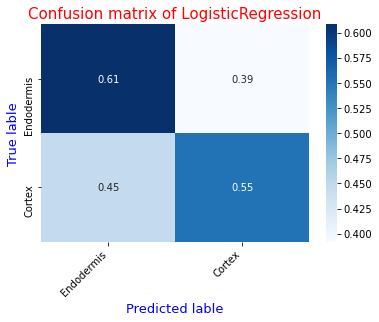

MultinomialNB() is applied here: 0.58
[[46 28]
 [35 41]]


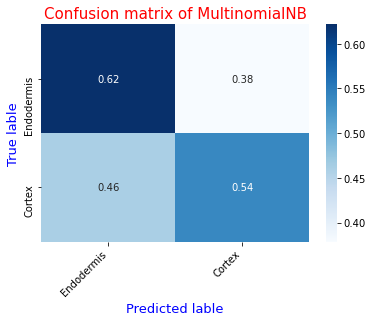

DecisionTreeClassifier(random_state=100) is applied here: 0.48
[[40 34]
 [44 32]]


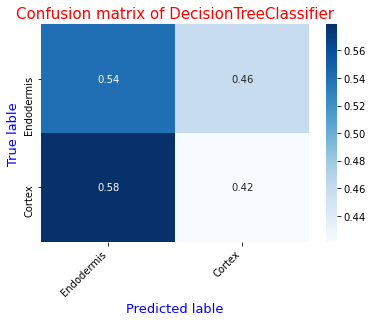

RandomForestClassifier(class_weight='balanced', max_depth=100,
                       min_samples_split=10, n_jobs=-1) is applied here: 0.5666666666666667
[[44 30]
 [35 41]]


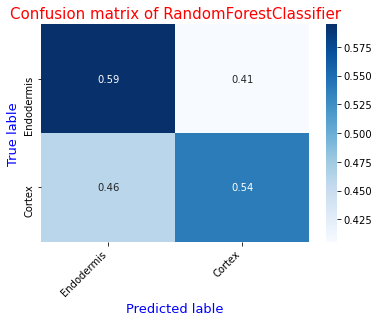

KNeighborsClassifier(n_neighbors=3) is applied here: 0.47333333333333333
[[38 36]
 [43 33]]


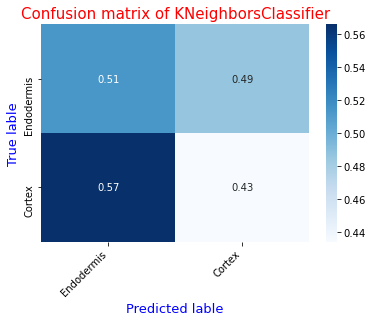

[0.58, 0.58, 0.48, 0.5666666666666667, 0.47333333333333333]


In [22]:
method_list = [LogisticRegression(multi_class='ovr'),
              MultinomialNB(),
              DecisionTreeClassifier(random_state= 100),
              RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0),
              KNeighborsClassifier(n_neighbors=3, weights = "uniform", leaf_size =  30)]
Accuracy_list = []
for method in method_list:
    # get model name
    modelname = type(method).__name__
    # Normalize the data
    normal = Normalizer()
    X_train = normal.fit_transform(X_train)
    X_test = normal.transform(X_test)
    # Handle imbalanced data
    ros = RandomOverSampler(random_state= 100)
    X_ros, y_ros = ros.fit_resample(X_train, y_train)
    # Train model
    clf = method.fit(X_ros, y_ros)
    # Predict 
    y_pred = clf.predict(X_test)
    # Evaluate model
    Accuracy_list.append(metrics.accuracy_score(y_test, y_pred))
    print(method,"is applied here:", metrics.accuracy_score(y_test, y_pred))
    cmatrix = confusion_matrix(y_test, y_pred)
    print(cmatrix)
    # Prepare for confusion plot
    x_axis_labels = ["Endodermis", "Cortex"] 
    y_axis_labels = ["Endodermis", "Cortex"] 
    cm = sns.heatmap(cmatrix/cmatrix.sum(axis=1)[:,None], annot=True, cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    cm.set_xticklabels(cm.get_xticklabels(), rotation=45, horizontalalignment='right')
    cm.set_ylabel('True lable', fontsize = 13, color = "blue") 
    cm.set_xlabel('Predicted lable', fontsize = 13, color ="blue") 
    cm.set_title('Confusion matrix of '+ modelname, fontsize = 15, color = "red") 
    plt.show()
    
    
print(Accuracy_list)

In [23]:

def get_models():
    models = []
    models.append(('NB', GaussianNB()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('MLPNN', MLPClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('SVML', SVC(kernel='linear')))
    models.append(('SVMR', SVC(kernel='rbf')))
    models.append(('GBoost', GradientBoostingClassifier()))
    models.append(('XGBoost', XGBClassifier()))
    return models

# evaluate models using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

>NB 0.512 (0.079)
>KNN 0.491 (0.072)
>LDA 0.514 (0.075)
>MLPNN 0.519 (0.073)
>RF 0.513 (0.059)
>SVML 0.521 (0.066)
>SVMR 0.511 (0.071)
>GBoost 0.510 (0.078)
>XGBoost 0.503 (0.082)


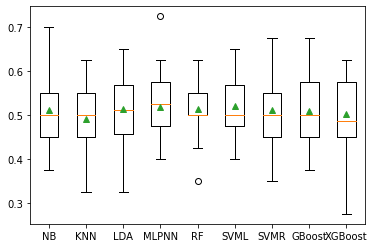

In [69]:
# compare the classification accuracy 
models = get_models()
# evaluate the models and store results
results = []
names = []
for name, model in models:
    accuracy = evaluate_model(model, mat_X, mat_Y)
    results.append(accuracy)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(accuracy), std(accuracy)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()